#1. Data Preprocessing

In [1]:
#Importing libraries

library(tidyverse)  # For data manipulation and visualization
library(lubridate)  # For time manipulation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
weather <- read_csv("/content/Delhi_Weather_data.csv")

Rows: 15246 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): main, description, date, day
dbl  (10): temp, temp_min, temp_max, pressure, sea_level, grnd_level, humidi...
dttm  (1): dt_txt
time  (1): time_of_record

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#To display the weather table
View(weather)

dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,date,day,time_of_record
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<time>
2020-01-27 09:00:00,22.49,21.43,22.49,1012,1012,985,38,Clouds,broken clouds,67,2.35,54,27-01-20,Monday,14:30:00
2020-01-27 12:00:00,20.34,19.64,20.34,1010,1010,983,42,Clouds,broken clouds,68,2.95,102,27-01-20,Monday,17:30:00
2020-01-27 15:00:00,17.86,17.51,17.86,1012,1012,985,48,Clouds,scattered clouds,35,2.60,106,27-01-20,Monday,20:30:00
2020-01-27 18:00:00,16.64,16.64,16.64,1011,1011,984,50,Clouds,broken clouds,66,3.60,109,27-01-20,Monday,23:30:00
2020-01-27 21:00:00,16.15,16.15,16.15,1010,1010,983,50,Clouds,scattered clouds,32,2.82,59,28-01-20,Tuesday,02:30:00
2020-01-28 00:00:00,14.83,14.83,14.83,1009,1009,982,54,Clouds,broken clouds,53,3.69,64,28-01-20,Tuesday,05:30:00
2020-01-28 03:00:00,14.96,14.96,14.96,1012,1012,985,57,Rain,light rain,38,5.04,123,28-01-20,Tuesday,08:30:00
2020-01-28 06:00:00,18.43,18.43,18.43,1012,1012,985,50,Clouds,broken clouds,51,4.59,120,28-01-20,Tuesday,11:30:00
2020-01-28 09:00:00,19.42,19.42,19.42,1009,1009,983,51,Clouds,scattered clouds,35,5.58,117,28-01-20,Tuesday,14:30:00


In [38]:
# Summary statistics to get an idea of the data.
summary(weather)

     dt_txt                            temp          temp_min    
 Min.   :2020-01-27 09:00:00.00   Min.   : 9.96   Min.   : 9.96  
 1st Qu.:2020-05-07 18:00:00.00   1st Qu.:21.31   1st Qu.:21.29  
 Median :2020-08-09 21:00:00.00   Median :29.39   Median :29.37  
 Mean   :2020-08-10 04:37:47.52   Mean   :28.43   Mean   :28.41  
 3rd Qu.:2020-11-13 03:00:00.00   3rd Qu.:35.01   3rd Qu.:34.99  
 Max.   :2021-02-20 09:00:00.00   Max.   :47.92   Max.   :47.92  
    temp_max        pressure      sea_level      grnd_level       humidity    
 Min.   : 9.96   Min.   : 985   Min.   : 985   Min.   :963.0   Min.   : 5.00  
 1st Qu.:21.36   1st Qu.: 999   1st Qu.: 999   1st Qu.:975.0   1st Qu.:20.00  
 Median :29.41   Median :1006   Median :1006   Median :982.0   Median :30.00  
 Mean   :28.47   Mean   :1006   Mean   :1006   Mean   :981.3   Mean   :33.14  
 3rd Qu.:35.05   3rd Qu.:1013   3rd Qu.:1013   3rd Qu.:988.0   3rd Qu.:43.00  
 Max.   :47.92   Max.   :1024   Max.   :1024   Max.   :997.0   M

In [39]:
# data types of each columns
print(str(weather))

spc_tbl_ [15,246 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ dt_txt        : POSIXct[1:15246], format: "2020-01-27 09:00:00" "2020-01-27 12:00:00" ...
 $ temp          : num [1:15246] 22.5 20.3 17.9 16.6 16.1 ...
 $ temp_min      : num [1:15246] 21.4 19.6 17.5 16.6 16.1 ...
 $ temp_max      : num [1:15246] 22.5 20.3 17.9 16.6 16.1 ...
 $ pressure      : num [1:15246] 1012 1010 1012 1011 1010 ...
 $ sea_level     : num [1:15246] 1012 1010 1012 1011 1010 ...
 $ grnd_level    : num [1:15246] 985 983 985 984 983 982 985 985 983 982 ...
 $ humidity      : num [1:15246] 38 42 48 50 50 54 57 50 51 55 ...
 $ main          : chr [1:15246] "Clouds" "Clouds" "Clouds" "Clouds" ...
 $ description   : chr [1:15246] "broken clouds" "broken clouds" "scattered clouds" "broken clouds" ...
 $ clouds        : num [1:15246] 67 68 35 66 32 53 38 51 35 68 ...
 $ wind_speed    : num [1:15246] 2.35 2.95 2.6 3.6 2.82 3.69 5.04 4.59 5.58 1.06 ...
 $ wind_degree   : num [1:15246] 54 102 106 109 59 64 123 120

In [6]:
#Checking if there are any missing values or not
sum(is.na(weather))

[1] 0

#2. Data Analysis

In [7]:
# Calculate the correlation between x and y
correlation <- cor(weather$temp, weather$pressure)

# Print the correlation
print(correlation)

[1] -0.8520813


In [26]:
#Correlation matrix
num.cols <- sapply(weather,is.numeric)
cor.data <- cor(weather[,num.cols])
cor.data

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,clouds,wind_speed,wind_degree
temp,1.0000000,0.99993903,0.99930379,-0.85208135,-0.8524204,-0.82429082,-0.30769106,0.1683255,0.32495128,-0.04305550
temp_min,0.9999390,1.00000000,0.99925228,-0.85227409,-0.8525839,-0.82443506,-0.30739991,0.1685796,0.32530277,-0.04276068
temp_max,0.9993038,0.99925228,1.00000000,-0.85201455,-0.8529347,-0.82490724,-0.30619115,0.1703547,0.32615402,-0.04255705
pressure,-0.8520813,-0.85227409,-0.85201455,1.00000000,0.9995485,0.99608083,-0.05031349,-0.3097395,-0.35518414,0.15046774
sea_level,-0.8524204,-0.85258388,-0.85293474,0.99954848,1.0000000,0.99649399,-0.05084440,-0.3106900,-0.35532714,0.14979055
grnd_level,-0.8242908,-0.82443506,-0.82490724,0.99608083,0.9964940,1.00000000,-0.08748663,-0.3199628,-0.35756739,0.15950052
humidity,-0.3076911,-0.30739991,-0.30619115,-0.05031349,-0.0508444,-0.08748663,1.00000000,0.3534857,0.05680366,-0.29106507
clouds,0.1683255,0.16857964,0.17035470,-0.30973953,-0.3106900,-0.31996281,0.35348570,1.0000000,0.12680558,-0.18924603
wind_speed,0.3249513,0.32530277,0.32615402,-0.35518414,-0.3553271,-0.35756739,0.05680366,0.1268056,1.00000000,0.06630372
wind_degree,-0.0430555,-0.04276068,-0.04255705,0.15046774,0.1497905,0.15950052,-0.29106507,-0.1892460,0.06630372,1.00000000


In [20]:
install.packages("corrplot")  # Install if not already installed
library(corrplot)  # Load the package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



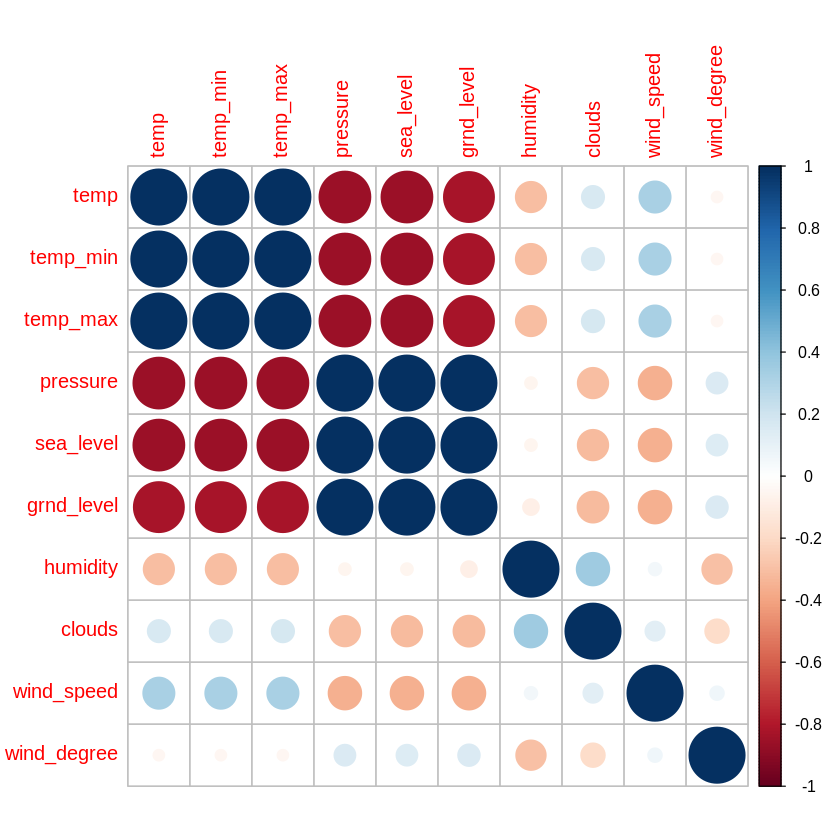

In [21]:
corrplot::corrplot(cor.data)

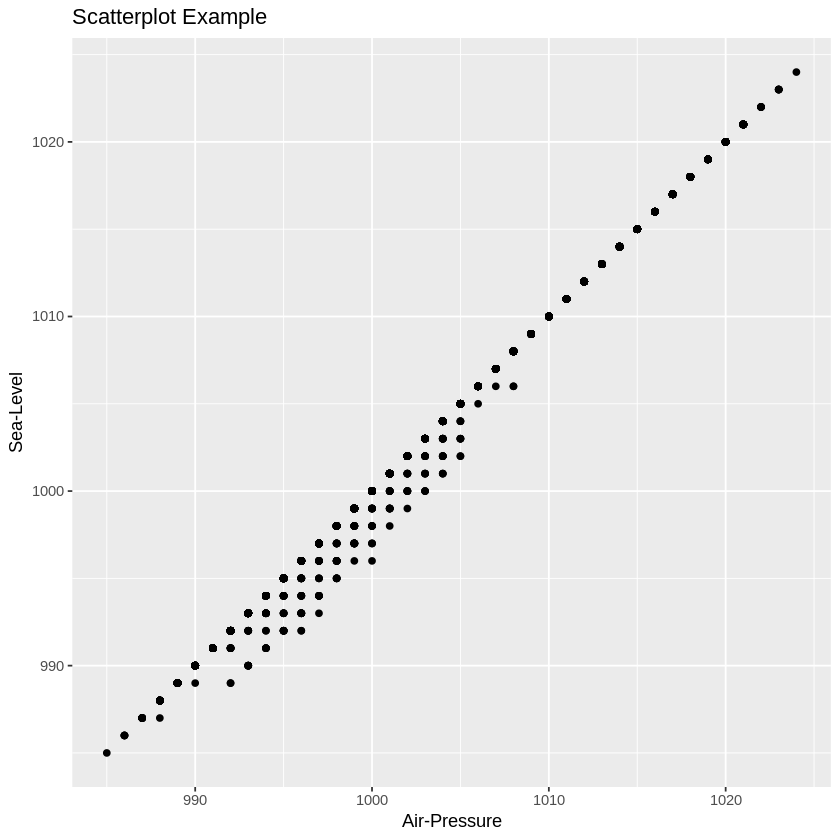

In [12]:
#Scatter Plot of Air pressure and Sea Level
# Create sample data
y <- weather$sea_level
x <- weather$pressure
df <- data.frame(x, y)

# Plot the scatterplot
library(ggplot2)
ggplot(df, aes(x, y)) +
  geom_point() +
  labs(title = "Scatterplot Example", x = "Air-Pressure", y = "Sea-Level")


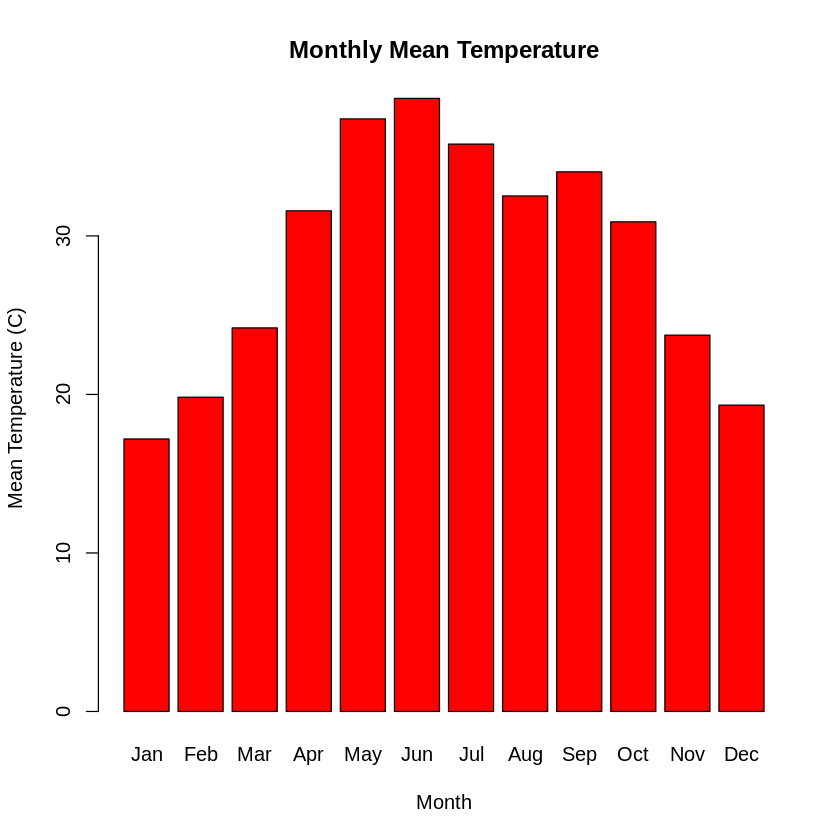

In [14]:
#To create a barplot for monthly mean temperature
# Aggregate the data by month
monthly_mean <- aggregate(weather$temp, by = list(month(weather$date)), FUN = mean)

# Create the barplot
label <-c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
barplot(monthly_mean$x, names.arg = label, xlab = "Month", ylab = "Mean Temperature (C)", main = "Monthly Mean Temperature",col='red')


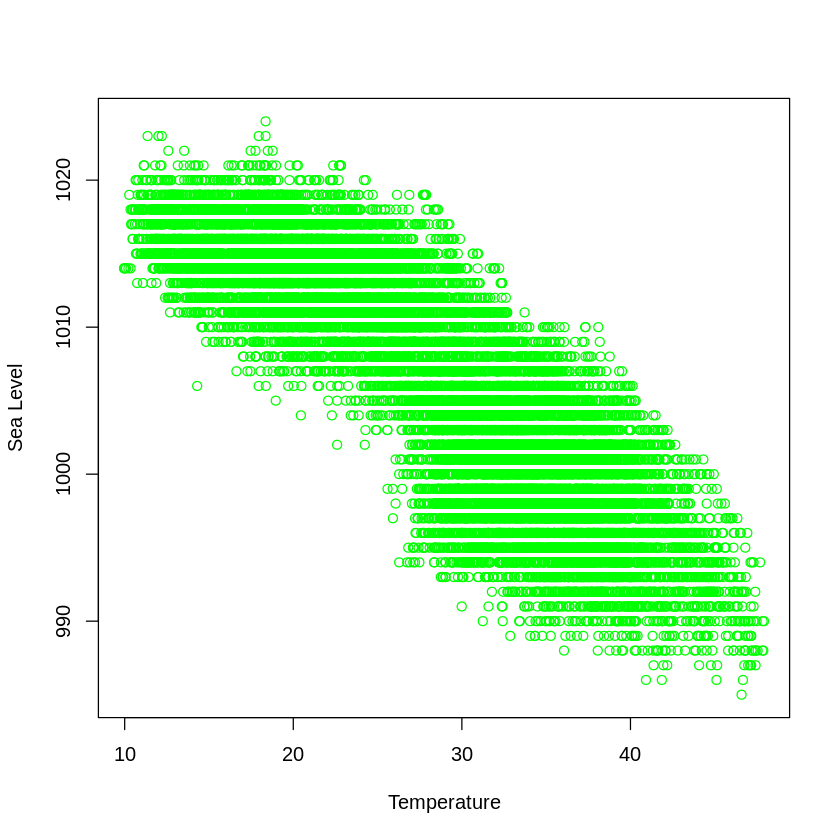

In [15]:
#Plot-1
b <- weather$sea_level
a <- weather$temp
plot(a,b,xlab="Temperature",ylab = "Sea Level",col="green")


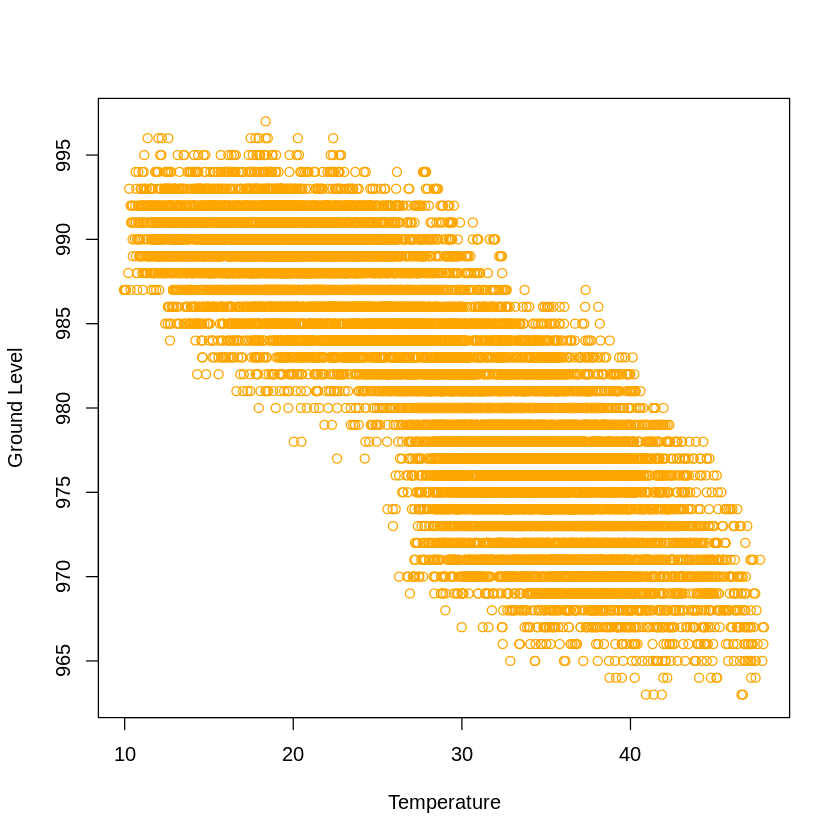

In [16]:
#Plot-2
c <- weather$grnd_level
d <- weather$temp
plot(d,c,xlab="Temperature",ylab = "Ground Level",col="orange")

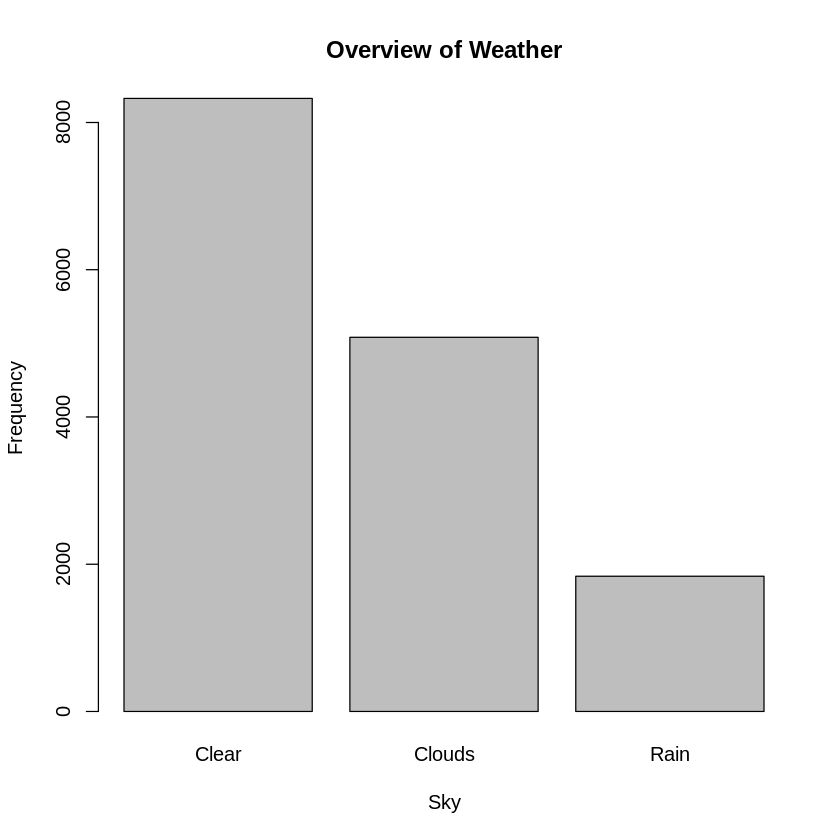

In [17]:
# Create a factor variable
category <- factor(weather$main)

# Extract the levels of the factor
lvl=levels(category)

barplot(table(category), main = "Overview of Weather", xlab = "Sky", ylab = "Frequency")


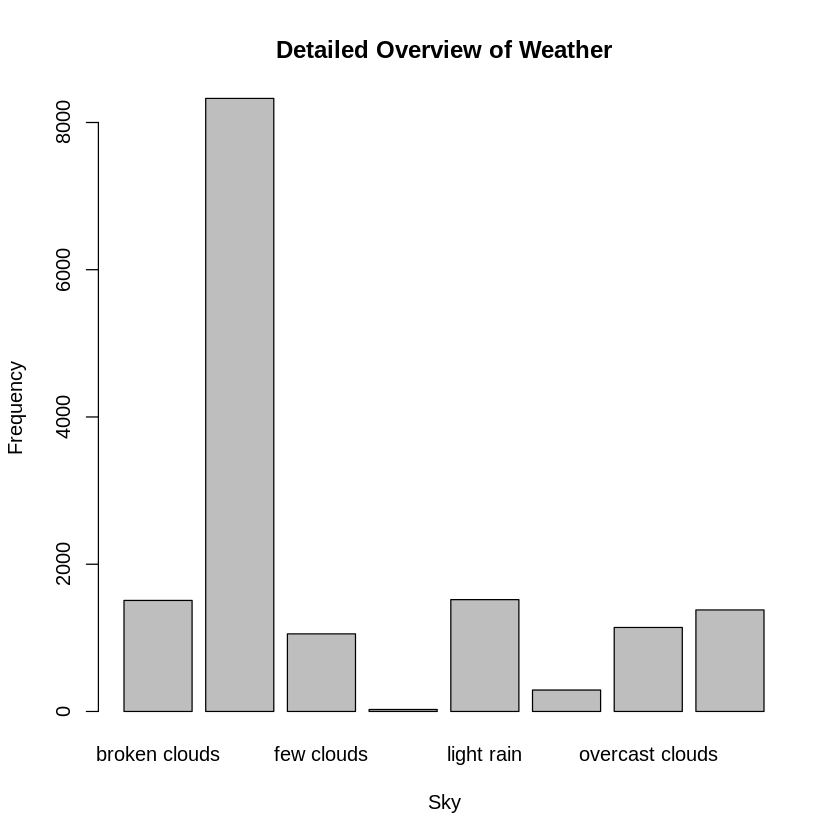

In [18]:
# Create a factor variable
category2 <- factor(weather$description)

# Extract the levels of the factor
lvl2=levels(category2)

barplot(table(category2), main = "Detailed Overview of Weather", xlab = "Sky", ylab = "Frequency")

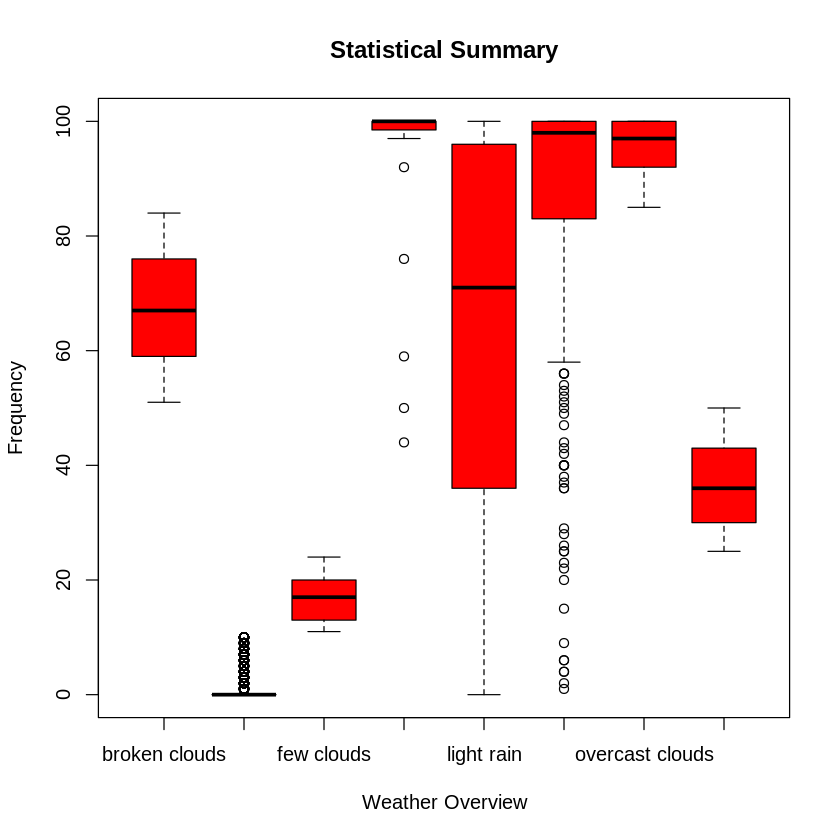

In [19]:
# Create a box plot
boxplot(weather$clouds ~ category2, main = "Statistical Summary", xlab = "Weather Overview", ylab = "Frequency",col="red")